# 분류

## #01. 분류와 군집의 차이

분류와 군집은모두 데이터를 특정한 집단으로 나눈다는 점에서 공통점이 있다.

|이름|설명|구분|알고리즘|
|---|---|---|---|
|분류|소속집단의 정보(종속변수o)를 이미 알고 있는 상태에서, 새로운 데이터를 비슷한 집단으로 묶는 방법|지도학습|K-NN(최근접이웃)|
|군집|소속집단의 정보(종속변수x)가 없는 상태에서 비슷한 데이터를 묶는 방법|비지도학습|K-Means|

## #02. 분류 예제

![img](res/img1.png)

> 산점도 그래프의 위쪽에 분포한 녹색 점은 진돗개이고, 아래쪽에 붉은 점은 닥스훈트 종이다.

### 1. K-NN 알고리즘

K-최근접 이웃(K-Nearest Neighbor)

특정 공간에 분포하는 데이터에 대하여 k개의 가장 가까운 이웃을 살펴보고 다수결의 방식으로 데이터 레이블을 항당하는 분류 방식

여기서 k는 분류(묶는)할 개수를 의미

### 2. K-NN의 특징

![img](res/img2.png)

- K-NN 알고리즘은 k의 값에 따라 결과가 달라진다.

- 단순히 이웃의 수를 계산하는게 아니라 이웃과의 거리에 가중치(wi)를 부여하는 모델을 만들 수 있다.
    - 가중치는 거리에 반비례하게 하여 새로 입력된 데이터와 가까운 위치의 점들은 더 높은 가중치를 얻고, 먼 점들은 더 낮은 가중치를 갖도록 한다.
- 알고리즘이 매우 단순하고 직관적이며, 사전학습이나 특별한 준비 시간이 필요 없다는 점은 장점
- 하지만 데이터 수가 많다면 많은 메모리 공간과 계산 시간이 필요하다는 단점이 있다.

KNN 모델 성능을 높이기 위해서는 스케일링 작업을 진행

## #03. 패키지

In [45]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

# KNN 분류를 위한 패키지
from sklearn.neighbors import KNeighborsClassifier

# 데이터 표준화
from sklearn.preprocessing import StandardScaler

# 분류 결과 판정을 위한 패키지
from sklearn import metrics

## #04. 데이터

In [3]:
origin = read_excel("https://data.hossam.kr/G02/dogs.xlsx")
origin

,dog,length,height
0,d,55,30
1,d,57,31
2,d,64,36
3,d,63,30
4,d,58,33
5,d,49,25
6,d,54,37
7,d,61,34
8,j,56,52
9,j,47,52


## #05. 데이터 분포 확인

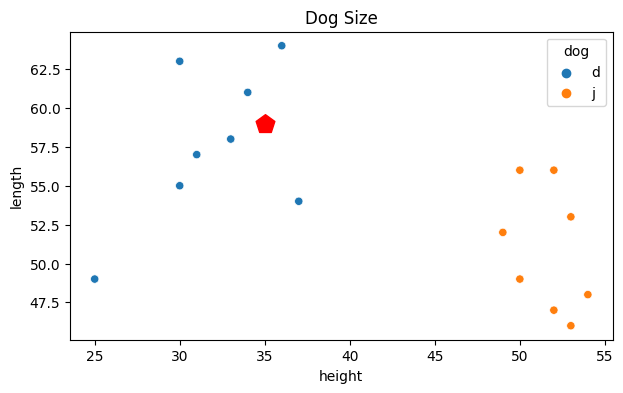

In [12]:
plt.figure(figsize=(7,4))
sb.scatterplot(data=origin, x='height', y='length', hue='dog')
plt.xlabel("height")
plt.ylabel("length")
plt.title("Dog Size")

# 새로운 데이터 투입
newdata_length = [59]
newdata_height = [35]
plt.scatter(newdata_height, newdata_length, marker="p", s=200, c="r", label='new data')

plt.show()
plt.close()

> 데이터가 비슷한 군집으로 모여있음을 시각화로 확인

## #06. K-NN 분류 모델 구성

### 종속변수 라벨링

In [14]:
df = origin.copy()
df['dog'] = origin['dog'].map({'d':0, 'j':1})
df

,dog,length,height
0,0,55,30
1,0,57,31
2,0,64,36
3,0,63,30
4,0,58,33
5,0,49,25
6,0,54,37
7,0,61,34
8,1,56,52
9,1,47,52


### 독립/종속 변수 분리

In [15]:
x = df.drop('dog', axis=1)
x.head()    #데이터프레임

,length,height
0,55,30
1,57,31
2,64,36
3,63,30
4,58,33


In [16]:
y = df['dog']
y.head()    #Series 객체

0    0
1    0
2    0
3    0
4    0
Name: dog, dtype: int64

### 분류 모델 구성

분류모델 학습

In [17]:
# 근접 이웃의 수를 3으로 설정
k = 3

# 모델 구성
knn = KNeighborsClassifier(n_neighbors=k)

# 모델 학습
fit = knn.fit(x,y)
fit

KNeighborsClassifier(n_neighbors=3)

### 학습 결과 확인

In [18]:
y_pred = knn.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### 새로운 데이터

In [20]:
# 배열은 2차, DF는 1차
# sklearn에 배열 데이터를 전달할 경우 2차원으로 구성
newdata_length = [59]
newdata_height = [35]
new_data = [[newdata_length[0], newdata_height[0]]]

new_pred = knn.predict(new_data)
new_pred
# 변수 이름을 안 알려줘서 경고가 발생

c:\Users\jehyu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [24]:
# 배열은 2차, DF는 1차
# sklearn에 배열 데이터를 전달할 경우 2차원으로 구성
newdata_length = [59]
newdata_height = [35]
new_data = [[newdata_length[0], newdata_height[0]]]

dog_classes = {0:'닥스훈트', 1:'진돗개'}
new_pred = knn.predict(new_data)

print('데이터:', new_data, "예측:", dog_classes[new_pred[0]])
# 변수 이름을 안 알려줘서 경고가 발생

데이터: [[59, 35]] 예측: 닥스훈트


c:\Users\jehyu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### k-nn에서 이웃한 데이터 얻기

결론 낼때 자주 사용

In [26]:
dist, indexs = knn.kneighbors(new_data, k)

# 거리
print("거리:", dist)    #데이터 값

# index
print("인덱스:", indexs)    #데이터 index

거리: [[2.23606798 2.23606798 4.47213595]]
인덱스: [[4 7 1]]


c:\Users\jehyu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### 이웃의 실제 데이터 확인

In [28]:
neighbor_data = origin.values[indexs]
neighbor_data

array([[['d', 58, 33],
        ['d', 61, 34],
        ['d', 57, 31]]], dtype=object)

In [31]:
print(neighbor_data[0])
print(neighbor_data[0][0])

[['d' 58 33]
 ['d' 61 34]
 ['d' 57 31]]
['d' 58 33]


### 분류 결과 시각화

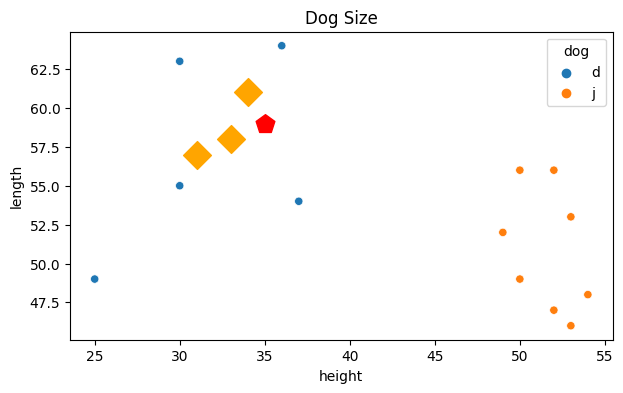

In [32]:
plt.figure(figsize=(7,4))
sb.scatterplot(data=origin, x='height', y='length', hue='dog')
plt.xlabel("height")
plt.ylabel("length")
plt.title("Dog Size")

# 새로운 데이터 투입
newdata_length = [59]
newdata_height = [35]
plt.scatter(newdata_height, newdata_length, marker="p", s=200, c="r", label='new data')

# 근접 이웃 표시
for i, v in enumerate(neighbor_data[0]):
    plt.scatter(v[2], v[1], marker="D", s=200, c='orange', label='neighbor')
# 0번째는 강아지 종류(d, j)
# length, height의 축이 바뀌면 v[1], v[2]의 위치를 변경

plt.show()
plt.close()

## #07. 데이터 표준화 적용

독릭변수 표준화

### 독립변수에 대한 표준화

In [37]:
scaler = StandardScaler()   
std_x = scaler.fit_transform(x)
# new data를 추가한 후 scaler 객체를 차후에 사용하기 위해 StandardScaler()와 fit_transform(x)를 분리
# fit은 학습, transform은 적용 부분. 즉, transform 부분만 사용
# std_x = StandardScaler().fit_transform(x)
std_x

array([[ 0.13882344, -1.15746348],
       [ 0.50901929, -1.05947716],
       [ 1.80470477, -0.56954552],
       [ 1.61960685, -1.15746348],
       [ 0.69411722, -0.8635045 ],
       [-0.97176411, -1.64739511],
       [-0.04627448, -0.4715592 ],
       [ 1.249411  , -0.76551818],
       [ 0.32392137,  0.9982357 ],
       [-1.34195996,  0.9982357 ],
       [ 0.32392137,  0.80226305],
       [-1.52705788,  1.09622203],
       [-0.97176411,  0.80226305],
       [-0.23137241,  1.09622203],
       [-0.41647033,  0.70427672],
       [-1.15686203,  1.19420835]])

### 새로운 분류 대상에 대한 표준화

In [38]:
std_new_data = scaler.transform(new_data)   #여기서는 fit_transform 사용 금지
std_new_data

c:\Users\jehyu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.87921515, -0.66753185]])

### K-NN 분류기 생성

분류모델 학습

In [39]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(std_x, y)   #표준화한 독립/종속변수. sklearn은 한 번 생성한 객체를 계속 사용

KNeighborsClassifier()

### 분류모델 확인

In [41]:
y_pred = knn.predict(std_x)
print("측정치:", y.values)
print("분류 결과:", y_pred)

측정치: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
분류 결과: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


### 새로운 분류 대상 추가

In [44]:
# 새로운 데이터에 대한 분류 결과
new_data_pred = knn.predict(std_new_data)
print("데이터:", new_data_pred, "예측:", dog_classes[new_data_pred[0]])

# 근접한 이웃의 거리와 인덱스
dist, indexs = knn.kneighbors(std_new_data, k)
print("거리:", dist, "인덱스:", indexs)

데이터: [0] 예측: 닥스훈트
거리: [[0.26956729 0.38294424 0.53913458 0.88781354 0.88781354]] 인덱스: [[4 7 1 0 3]]


### 표준화 적용 결과와 분류 결과 시각화

#### 표준화 결과에 대한 임시 DF 생성

In [50]:
tmp_df = DataFrame(std_x, columns=['length', 'height']) #columns로 각 컬럼의 의미를 설명
# tmp_df.head()
tmp_df['dog'] = y   #종속변수 추가
tmp_df.head()

,length,height,dog
0,0.138823,-1.157463,0
1,0.509019,-1.059477,0
2,1.804705,-0.569546,0
3,1.619607,-1.157463,0
4,0.694117,-0.863505,0


In [54]:
neighbor_data = tmp_df.values[indexs]
neighbor_data

array([[[ 0.69411722, -0.8635045 ,  0.        ],
        [ 1.249411  , -0.76551818,  0.        ],
        [ 0.50901929, -1.05947716,  0.        ],
        [ 0.13882344, -1.15746348,  0.        ],
        [ 1.61960685, -1.15746348,  0.        ]]])

>사용할 데이터는 길리, 높이이므로 index 0, 1 번째 데이터

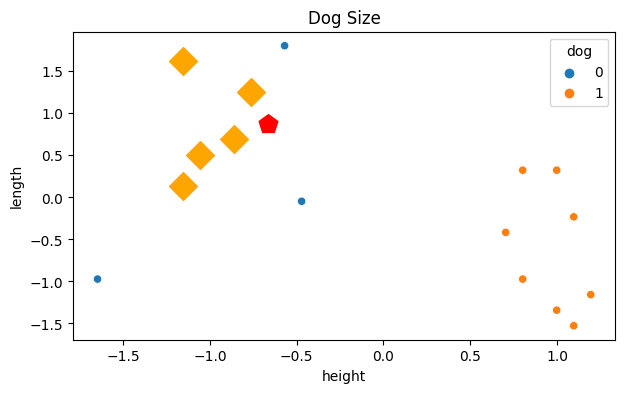

In [56]:
plt.figure(figsize=(7,4))
sb.scatterplot(data=tmp_df, x='height', y='length', hue='dog')
plt.xlabel("height")
plt.ylabel("length")
plt.title("Dog Size")

# 새로운 데이터 투입
plt.scatter(std_new_data[0][1], std_new_data[0][0], marker="p", s=200, c="red", label='new data')

# 근접 이웃 표시
for i, v in enumerate(neighbor_data[0]):
    plt.scatter(v[1], v[0], marker="D", s=200, c='orange', label='neighbor')
# index 2는 강아지 종류(d, j)
# length, height의 축이 바뀌면 v[0], v[1]의 위치를 변경

plt.show()
plt.close()

> 입력된 객체와 비슷한 특성을 갖는 객체들의 군집화를 통해 어디로 어떤 특성을 가지고 어떻게 분류될지를 분석